In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("hr_analytics_dataset.csv")

In [6]:
df

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Attrition
0,1,50,Female,Finance,HR Specialist,6858,4,4,4,No,No
1,2,36,Female,Sales,Sales Executive,12040,13,4,4,Yes,No
2,3,29,Male,Finance,Manager,17254,2,2,3,No,Yes
3,4,42,Female,R&D,Manager,13470,4,3,2,Yes,No
4,5,40,Female,Finance,HR Specialist,3252,4,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
195,196,40,Female,R&D,Finance Executive,5391,14,3,4,No,No
196,197,41,Male,IT,HR Specialist,13157,7,3,4,No,No
197,198,53,Male,R&D,IT Analyst,7951,1,3,3,Yes,No
198,199,28,Female,R&D,Finance Executive,10007,2,2,4,No,No


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EmployeeID       200 non-null    int32 
 1   Age              200 non-null    int64 
 2   Gender           200 non-null    object
 3   Department       200 non-null    object
 4   JobRole          200 non-null    object
 5   MonthlyIncome    200 non-null    int64 
 6   YearsAtCompany   200 non-null    int64 
 7   JobSatisfaction  200 non-null    int64 
 8   WorkLifeBalance  200 non-null    int64 
 9   OverTime         200 non-null    object
 10  Attrition        200 non-null    object
dtypes: int32(1), int64(5), object(5)
memory usage: 16.5+ KB


In [5]:
df

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Attrition
0,1,50,Female,Finance,HR Specialist,6858,4,4,4,No,No
1,2,36,Female,Sales,Sales Executive,12040,13,4,4,Yes,No
2,3,29,Male,Finance,Manager,17254,2,2,3,No,Yes
3,4,42,Female,R&D,Manager,13470,4,3,2,Yes,No
4,5,40,Female,Finance,HR Specialist,3252,4,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
195,196,40,Female,R&D,Finance Executive,5391,14,3,4,No,No
196,197,41,Male,IT,HR Specialist,13157,7,3,4,No,No
197,198,53,Male,R&D,IT Analyst,7951,1,3,3,Yes,No
198,199,28,Female,R&D,Finance Executive,10007,2,2,4,No,No


In [34]:
# Department wise maximum Salary

income=df.groupby("JobRole")["MonthlyIncome"].max().reset_index()
income.columns=["job","income"]
income

,job,income
0,Finance Executive,19302
1,HR Specialist,19144
2,IT Analyst,19844
3,Manager,19988
4,Research Scientist,18748
5,Sales Executive,19447


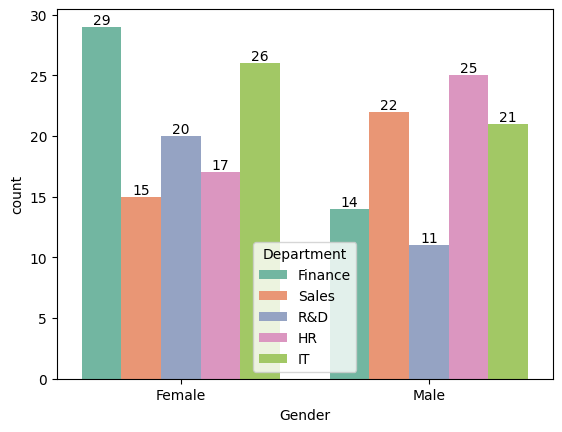

In [7]:
ax=sns.countplot(data=df,x="Gender",hue="Department",palette="Set2")

for bars in ax.containers:
    ax.bar_label(bars)
    

plt.show()

In [95]:
df["EmployeeID"]=df["EmployeeID"].astype('int32')

In [26]:
b=df.groupby(['Gender','Attrition'])['MonthlyIncome'].sum().unstack()
b

Attrition,No,Yes
Gender,,
Female,889484,250037
Male,835214,240922


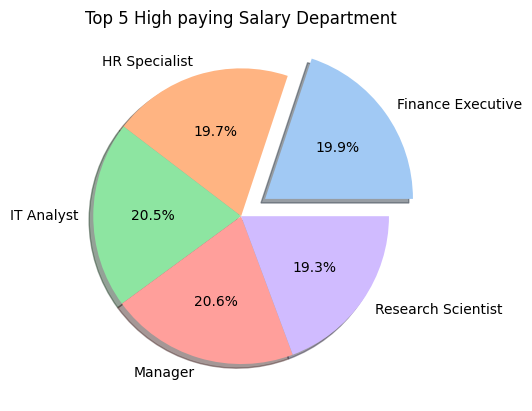

In [69]:
#high paying Jobs Department wise analysis

income=df.groupby("JobRole")['MonthlyIncome'].max().head()
myexplode=[0.2,0,0,0,0]
colors=sns.color_palette('pastel')
plt.pie(income.values,autopct="%1.1f%%",labels=income.index,shadow=True,colors=colors,explode=myexplode)
plt.title('Top 5 High paying Salary Department')
plt.show()

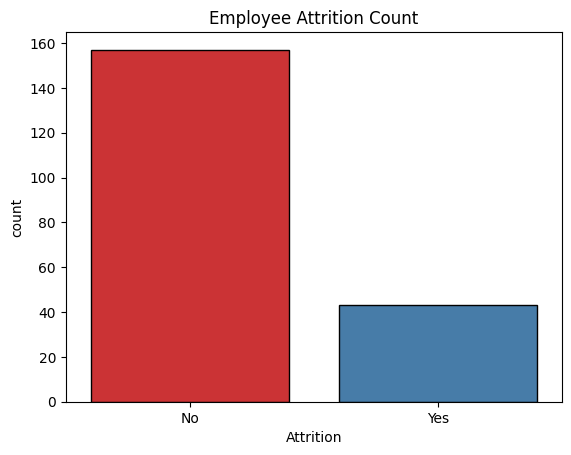

In [68]:
# Attrition count yes or no

sns.countplot(data=df, x='Attrition',palette='Set1',hue='Attrition',edgecolor='black')
plt.title("Employee Attrition Count")
plt.show()



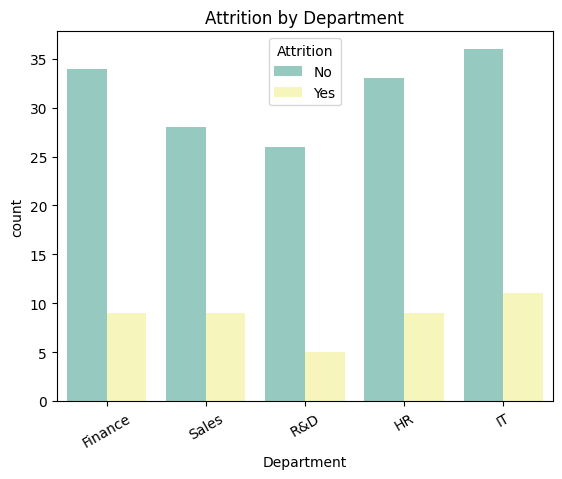

In [14]:
# Attrition by Department yes or no count
sns.countplot(data=df,x='Department',hue='Attrition',palette='Set3')
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()
plt.show()

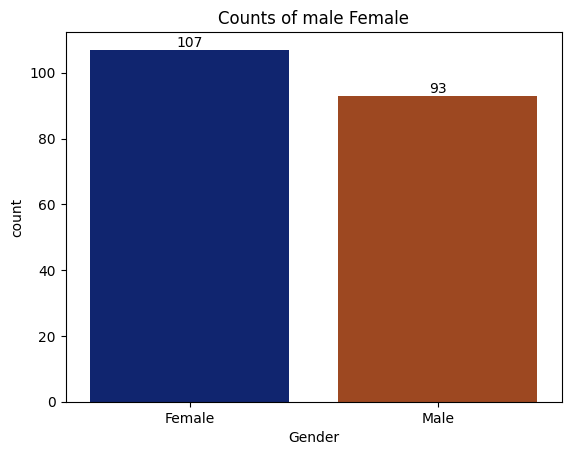

In [15]:
#Counts how many male and female
ax=sns.countplot(data=df,x="Gender",hue='Gender',palette='dark')  
plt.title('Counts of male Female')


for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

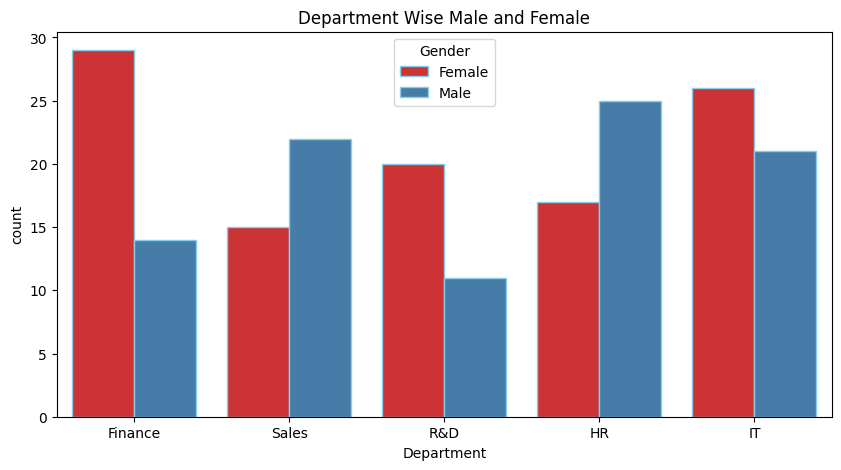

In [38]:
# count male and female by department wise
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Department',hue='Gender',palette='Set1',edgecolor='skyblue')
plt.title('Department Wise Male and Female')
plt.show()

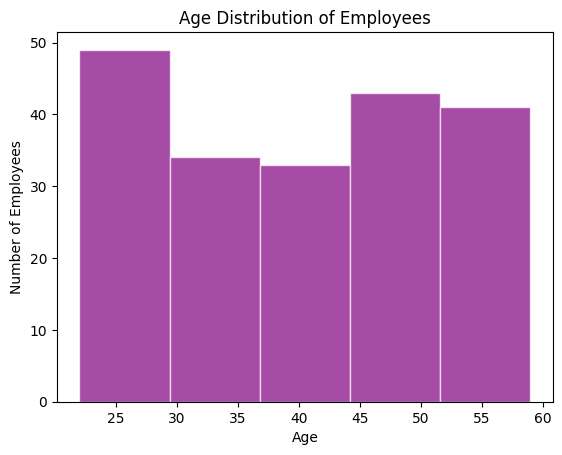

In [29]:
# Employee Age Group working in the Office

plt.hist(df["Age"], bins=5, edgecolor="white", alpha=0.7,color='purple')
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

<Figure size 1200x600 with 0 Axes>

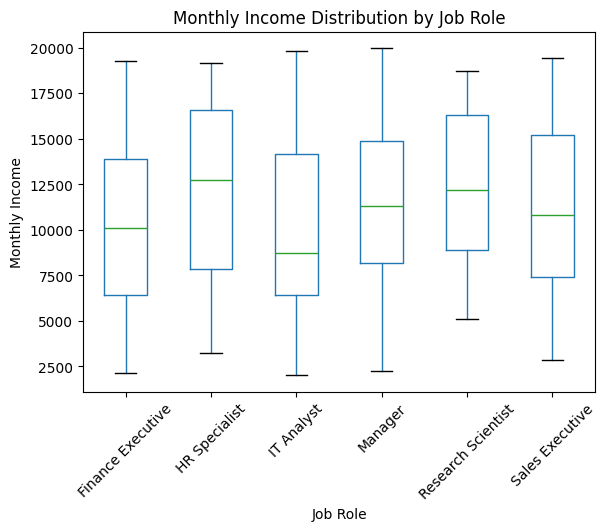

In [4]:
# Boxplot of Monthly Income by Job Role
plt.figure(figsize=(12,6))
df.boxplot(column="MonthlyIncome", by="JobRole", grid=False)

plt.title("Monthly Income Distribution by Job Role")
plt.suptitle("")  # removes the automatic title
plt.xlabel("Job Role")
plt.ylabel("Monthly Income")
plt.xticks(rotation=45)  # rotate labels for readability
plt.show()


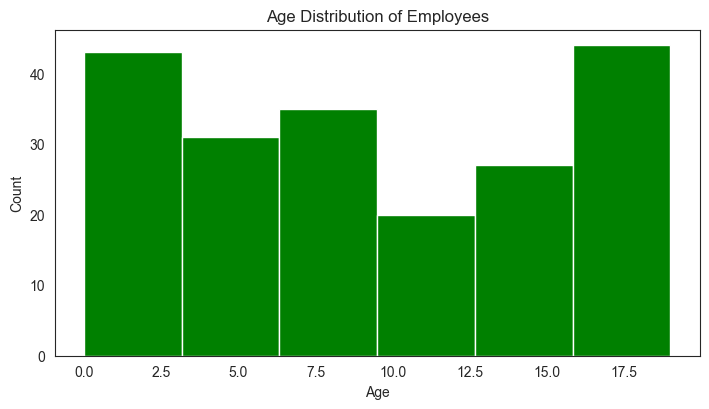

In [8]:
plt.figure(figsize=(7,4))
sns.set_style(style='white')
plt.hist(df["YearsAtCompany"],bins=6,edgecolor='white',color='green')
plt.title("Age Distribution of Employees")
plt.tight_layout()
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

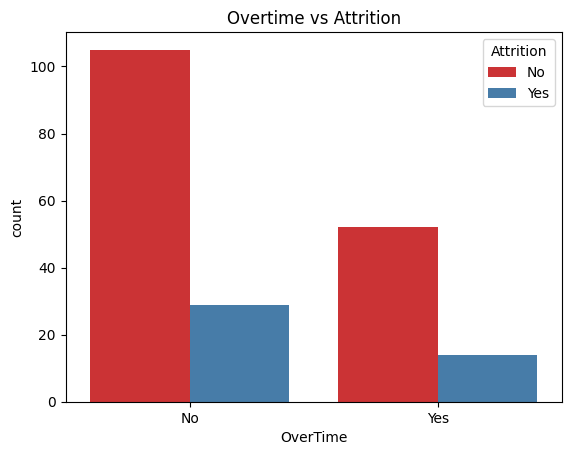

In [4]:
sns.countplot(data=df,x='OverTime',hue='Attrition',palette='Set1')
plt.title('Overtime vs Attrition')
plt.show()